# K Neighbors Classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from heapq import nsmallest # python standard library has a function to return n smallest on a list
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
from sklearn.linear_model import LogisticRegression

import sys
sys.path.append("../..")
from E4525_ML import plots
from E4525_ML import samples

In [2]:
seed=23565
np.random.seed(seed)

## KNeighbors algorithm Implementation

In [3]:
def distance2(x1,x2):
    dx=x2-x1
    X2=dx*dx    
    return X2.sum(axis=1)

In [4]:
x0=np.array((1.0,1.0))
X1=np.array(((2.0,2.0),(1.1,0.0),(0.0,1.0),(1.0,1.0),(1.0,5.0)))
Y=np.array((True,True,False,False,True))
distance2(X1,x0)

array([ 2.  ,  1.01,  1.  ,  0.  , 16.  ])

In [5]:
# find the indexes on X of the k nearest neighbors to x
def find_neighbors(x,X,k,distance):
    distances=distance(X,x)
    #this function returns the k elements on largest values in the distances array
    indexes=np.argpartition(distances,k)[0:k] #https://docs.scipy.org/doc/numpy-1.8.0/reference/generated/numpy.argpartition.html
    return indexes

def most_common(X):
    # values has unique values in X
    # counts has their multiplicites
    values,counts=np.unique(X,return_counts=True)
    return values[counts.argmax()]
   

In [6]:
indexes=find_neighbors(x0,X1,3,distance2)
for index in indexes:
    print(index,X1[index],Y[index])

3 [1. 1.] False
2 [0. 1.] False
1 [1.1 0. ] True


In [7]:
class KNeighbors:
    def __init__(self,k,distance):
        self.k=k
        self.distance=distance
    def fit(self,X,Y):
        self.X=X
        self.Y=Y
        
    def predict(self,X):
        y=[]
        for i1 in range(len(X)):
            x=X[i1]
            indexes=find_neighbors(x,self.X,self.k,self.distance)
            votes=self.Y[indexes]
            y.append(most_common(votes))
        return np.array(y)

In [8]:
model=KNeighbors(3,distance2)
model.fit(X1,Y)
print(x0,"predited: ",model.predict([x0]))
x_new=np.array([[2,2]])
print(x_new,"predicted:",model.predict(x_new))

[1. 1.] predited:  [False]
[[2 2]] predicted: [ True]


In [9]:
model=KNeighbors(1,distance2)
model.fit(X1,Y)
Y_predicted=model.predict(X1)
Y_predicted==Y

array([ True,  True,  True,  True,  True])

### Generate Data for a binary classification Problem

In [10]:

N = 50 # number of points per class in training data

X,y=samples.ellipsoid(N)
X_test,y_test=samples.ellipsoid(100) # we save away test date for later



We have two classes located on two concentric, and slighly off center ellipses

(-10, 10)

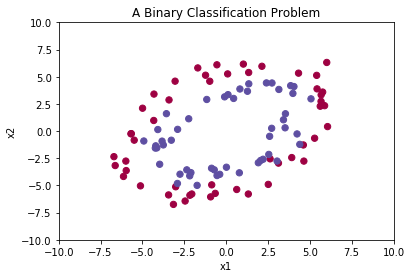

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("A Binary Classification Problem")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim([-10,10])
plt.ylim([-10,10])
#fig.savefig('ellipse.png')

## Nearest Neighbor Classifier

Simplest is to just pick the closest example on tranining set

In [12]:
K=1
model=KNeighbors(K,distance2)
model.fit(X,y)
np.average(model.predict(X)==y)

1.0

Performance on training set is perfect.

What about test data not used on the fit?

In [13]:

np.average(model.predict(X_test)==y_test)

0.88

Generalization performance is not as good as training set performance

### Decision Boundary

With too many parameters the decision boundary can become very irregular to (over)fit the training date perfectly



Text(0.5,1,'Test Data Performance')

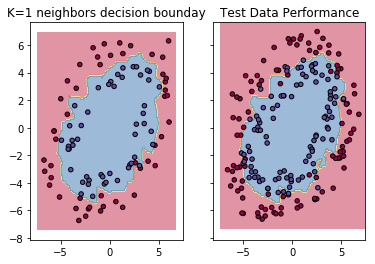

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True)
plots.decision_boundary_2d(model,X,y,ax1)
ax1.set_title("K={0} neighbors decision bounday".format(K))
plots.decision_boundary_2d(model,X_test,y_test,ax2)
ax2.set_title("Test Data Performance")
#fig.savefig('overfitted.png')

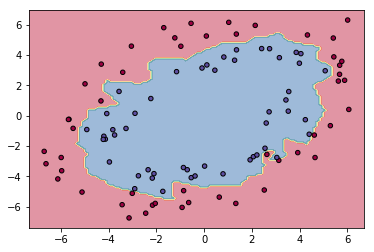

In [15]:
f, ax1 = plt.subplots(1, 1, sharey=True,sharex=True)
plots.decision_boundary_2d(model,X,y,ax1)

## 3 Nearest Neighbor Classifier

In [16]:
K=3
model=KNeighbors(K,distance2)
model.fit(X,y)
np.average(model.predict(X)==y)

0.94

In [17]:
np.average(model.predict(X_test)==y_test)

0.895

Text(0.5,1,'Test Data Performance')

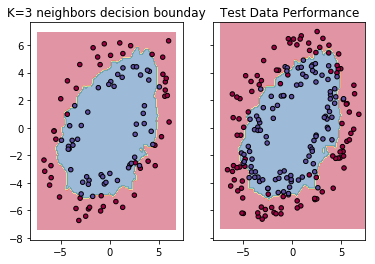

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True)
plots.decision_boundary_2d(model,X,y,ax1)
ax1.set_title("K={0} neighbors decision bounday".format(K))
plots.decision_boundary_2d(model,X_test,y_test,ax2)
ax2.set_title("Test Data Performance")
#fig.savefig('overfitted.png')

## 11th Nearest Neighbor Classifier

In [19]:
K=11
model=KNeighbors(K,distance2)
model.fit(X,y)
np.average(model.predict(X)==y)

0.85

In [20]:
np.average(model.predict(X_test)==y_test)

0.845

Text(0.5,1,'Test Data Performance')

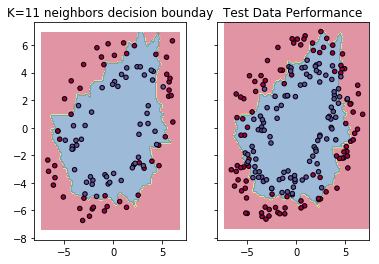

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True)
plots.decision_boundary_2d(model,X,y,ax1)
ax1.set_title("K={0} neighbors decision bounday".format(K))
plots.decision_boundary_2d(model,X_test,y_test,ax2)
ax2.set_title("Test Data Performance")
#fig.savefig('overfitted.png')

## 31th Nearest Neighbor Classifier¶

In [22]:
K=31
model=KNeighbors(K,distance2)
model.fit(X,y)
np.average(model.predict(X)==y)

0.54

In [23]:
np.average(model.predict(X_test)==y_test)

0.6

Text(0.5,1,'Test Data Performance')

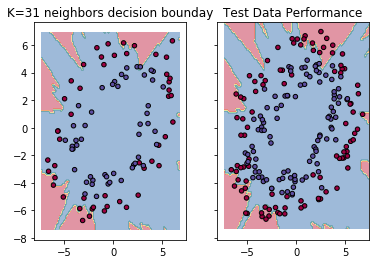

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True)
plots.decision_boundary_2d(model,X,y,ax1)
ax1.set_title("K={0} neighbors decision bounday".format(K))
plots.decision_boundary_2d(model,X_test,y_test,ax2)
ax2.set_title("Test Data Performance")
#fig.savefig('overfitted.png')

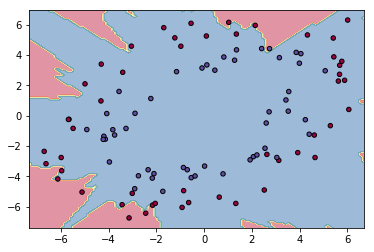

In [25]:
f, ax1 = plt.subplots(1, 1, sharey=True,sharex=True)
plots.decision_boundary_2d(model,X,y,ax1)

# Comparison to SKLearn

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
K=3
model=KNeighbors(K,distance2)
model.fit(X,y)
np.average(model.predict(X_test)==y_test)

0.895

In [28]:
K=3
sk_model=KNeighborsClassifier(K)
sk_model.fit(X,y)
np.average(sk_model.predict(X_test)==y_test)

0.895